In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cc_df = pd.read_csv("creditcard.csv").rename({"Class":"Fraud_Flag"}, axis=1)

In [7]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud_Flag
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = pd.get_dummies(cc_df.iloc[:,1:30], dtype="int", drop_first=True)

In [10]:
y = cc_df["Fraud_Flag"]

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
lr = logreg.fit(X_train, y_train)

In [13]:
print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")
#f1 score
# precision_recall_curve

Train Accuracy: 0.999161710812175
Test Accuracy: 0.9992099996488887


In [14]:
y.value_counts()

Fraud_Flag
0    284315
1       492
Name: count, dtype: int64

In [15]:
# ?!pip install imbalanced-learn
import imblearn.over_sampling as OS
# help(over_sampling)

In [17]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

ratio = {1:n_pos * 4, 0:n_neg}

ROS = OS.RandomOverSampler(
    sampling_strategy=ratio,
    random_state=101
)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversampled Positive Class Count: {np.sum(y_train_rs)}")

Original Positive Class Count: 389
Oversampled Positive Class Count: 1556


In [20]:
y_pred_test = lr.predict(X_test)
f1_original = f1_score(y_test, y_pred_test)
y_pred_test_rs = lr.predict(X_train_rs)

f1_oversampled = f1_score(y_train_rs, y_pred_test_rs)

print(f"F1 Score (Original): {f1_original}")
print(f"F1 Score (Oversampled): {f1_oversampled}")


F1 Score (Original): 0.7398843930635838
F1 Score (Oversampled): 0.7360063517268758


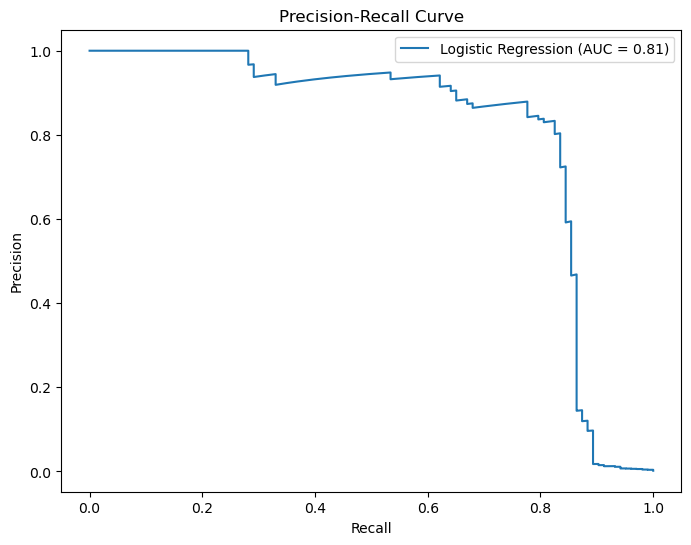

In [23]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_prob_test = lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


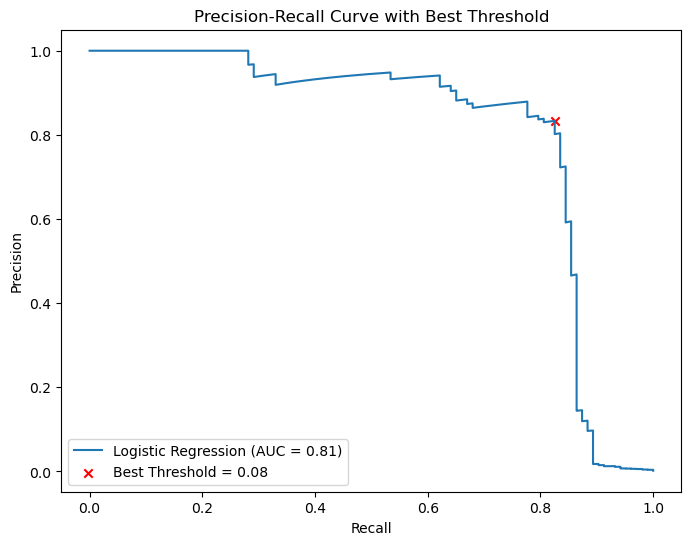

Best Threshold: 0.08


In [24]:
best_threshold_index = np.argmax(precision + recall)
best_threshold = thresholds[best_threshold_index]

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], c='red', marker='x', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Best Threshold')
plt.legend()
plt.show()

print(f'Best Threshold: {best_threshold:.2f}')
